<h1> Capstone Data Wrangling Module </h1>
<p> Per my mentor's advice, here is my data wrangling submission for module 12.5.  I spent most of the time just trying to find 4-leaf clover pictures on the internet.  Instagram has by far the largest set.  I screen captured a large set of 4-leaf clovers from Instagram and Twitter.  I then wrote a simple .NET Winforms program that help me very quickly crop the 4-leaf clover pics from the screen captures and save them to a target folder.  I use the same program to parse through 3-leaf clover images that I took with my Iphone to creat a 3-leaf clover set.    
    
   

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


<h1>Load the Raw Data and Display Some Samples:</h1>

In [55]:
DATADIR = ".\Data"
CATEGORIES= ["3-Leaf Clover", "4-Leaf Clover"]

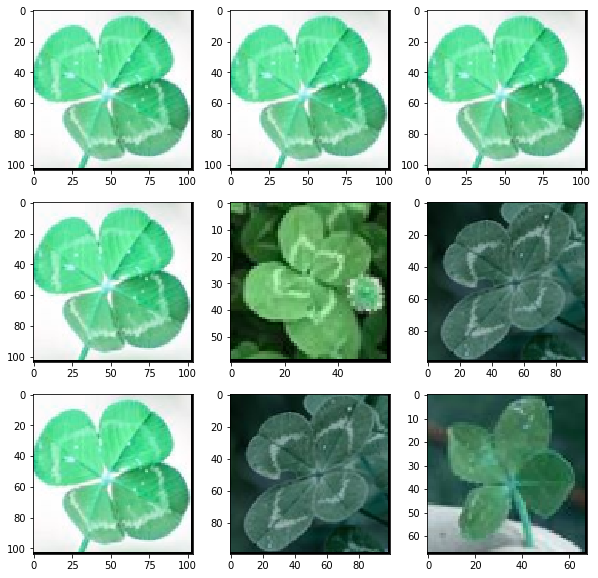

In [74]:
raw_image_4leaf_clovers=[]
raw_image_3leaf_clovers=[]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        
        img_array = cv2.imread(os.path.join(path,img))
        if (category=="3-Leaf Clover"):
            raw_image_3leaf_clovers.append(img_array)
        else:
            raw_image_4leaf_clovers.append(img_array)
            

    
f, axarr = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(raw_image_4leaf_clovers[i*j])





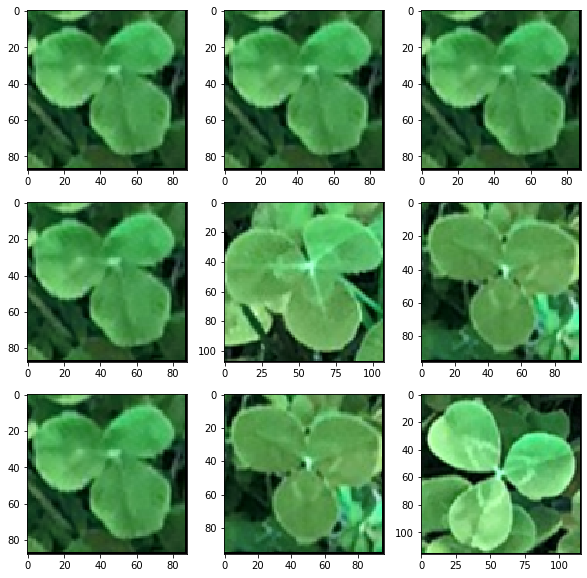

In [75]:
f, axarr = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(raw_image_3leaf_clovers[i*j])

<h1>Reload the data in grescale and size everything to 128 x 128:</h1>

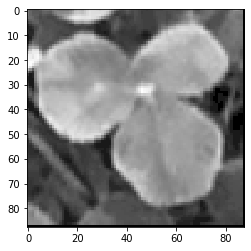

In [4]:


for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array)

[[ 92  78  74 ... 115 103   0]
 [ 99  84  74 ... 102 102   0]
 [ 96  84  76 ...  95  95   0]
 ...
 [116 115 114 ...  53  53   0]
 [118 117 116 ...  53  53   0]
 [  0   0   0 ...   0   0   0]]


In [6]:
img_array.shape

(88, 88)

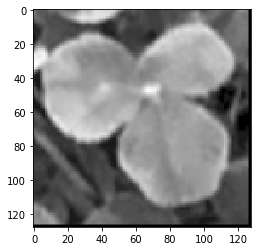

In [7]:
IMG_SIZE=128

new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [8]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
    

In [29]:
create_training_data()
print(len(training_data))
training_data

1184


[[array([[183, 167, 151, ...,  93,  62,   0],
         [152, 138, 129, ...,  89,  59,   0],
         [120, 108, 108, ...,  87,  58,   0],
         ...,
         [107,  84,  71, ...,  95,  69,   0],
         [ 96,  81,  71, ...,  65,  48,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  0],
 [array([[184, 192, 201, ...,  91,  49,   0],
         [179, 187, 195, ...,  98,  53,   0],
         [170, 178, 186, ..., 106,  57,   0],
         ...,
         [113, 109, 104, ..., 147,  78,   0],
         [ 60,  58,  56, ...,  79,  42,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  1],
 [array([[ 50,  58,  75, ..., 127, 123,   0],
         [ 68,  80,  85, ..., 130, 126,   0],
         [ 91,  88,  81, ..., 129, 128,   0],
         ...,
         [150, 151, 149, ...,  36,  10,   0],
         [ 87, 102, 107, ...,  20,   1,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  1],
 [array([[138, 134, 134, ..., 123, 123,  31],
         [136, 134, 1

In [11]:
#Shuffle the categories
import random
random.shuffle(training_data)

In [42]:
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


[[[[183]
   [167]
   [151]
   ...
   [ 93]
   [ 62]
   [  0]]

  [[152]
   [138]
   [129]
   ...
   [ 89]
   [ 59]
   [  0]]

  [[120]
   [108]
   [108]
   ...
   [ 87]
   [ 58]
   [  0]]

  ...

  [[107]
   [ 84]
   [ 71]
   ...
   [ 95]
   [ 69]
   [  0]]

  [[ 96]
   [ 81]
   [ 71]
   ...
   [ 65]
   [ 48]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]]


In [35]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
1
1
1
0
1


<h1>Test a ML Model</h1>
<p> I followed a tutorial to create a Tensorflow Deep Learning ML model just for fun.  I've yet to take the Deep Learning training module, so I understand very little about the below code.  It take, however, take some troubleshooting and configuration just to get the model to work on my local PC

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [43]:
#normalize the model
X = X/255.0
X

array([[[[0.71764706],
         [0.65490196],
         [0.59215686],
         ...,
         [0.36470588],
         [0.24313725],
         [0.        ]],

        [[0.59607843],
         [0.54117647],
         [0.50588235],
         ...,
         [0.34901961],
         [0.23137255],
         [0.        ]],

        [[0.47058824],
         [0.42352941],
         [0.42352941],
         ...,
         [0.34117647],
         [0.22745098],
         [0.        ]],

        ...,

        [[0.41960784],
         [0.32941176],
         [0.27843137],
         ...,
         [0.37254902],
         [0.27058824],
         [0.        ]],

        [[0.37647059],
         [0.31764706],
         [0.27843137],
         ...,
         [0.25490196],
         [0.18823529],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.72156863],
         [0.75294118],
         [0.78

In [51]:
y = np.array(y)

In [52]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [53]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3
26/26 [==============================] - 146s 6s/step - loss: 1.4420 - accuracy: 0.5857 - val_loss: 0.4388 - val_accuracy: 0.9831
Epoch 2/3
26/26 [==============================] - 136s 5s/step - loss: 0.5587 - accuracy: 0.6993 - val_loss: 0.1781 - val_accuracy: 0.9775
Epoch 3/3
26/26 [==============================] - 138s 5s/step - loss: 0.4102 - accuracy: 0.7971 - val_loss: 0.3052 - val_accuracy: 0.8820
